# Proyecto DS - Parte I: Visualizaciones en Python

**Dataset:** [Adult Income (UCI)](https://archive.ics.uci.edu/dataset/2/adult)


## Abstract

El conjunto de datos Adult Income (UCI) recopila información sociodemográfica de individuos residentes en Estados Unidos, con el objetivo de predecir si sus ingresos anuales superan los 50,000 USD. Este dataset incluye 48,842 registros y 15 atributos, que abarcan variables numéricas (como edad, horas trabajadas por semana, ganancias de capital) y categóricas (nivel educativo, ocupación, estado civil, raza, género, entre otros). La relevancia de este conjunto de datos radica en su utilización frecuente en tareas de clasificación y en el análisis de desigualdad económica y movilidad social.

Para el avance del proyecto, se propone explorar este dataset a través de visualizaciones univariadas, bivariadas y multivariadas que permitan comprender la distribución de las variables, sus relaciones y tendencias entre grupos de interés. En particular, se hará hincapié en la detección de valores faltantes y su posible impacto en el análisis, así como en la interpretación de patrones demográficos y laborales vinculados al nivel de ingresos. El estudio inicial servirá como base para definir hipótesis claras y formular modelos predictivos en etapas posteriores del proyecto.

## 1. Objetivo y Contexto

El objetivo de este proyecto es identificar y modelar los factores que influyen en que un individuo gane más de 50 000 USD al año, usando el dataset “Adult” de UCI.  
- **Contexto:** Recursos humanos, análisis de desigualdad salarial.  
- **Uso de la data:** Estadística descriptiva y visualizaciones para entender patrones de ingreso.


## 2. Variables

El dataset contiene 14 características de entrada y la variable objetivo `income`:
1. `age`: edad en años  
2. `workclass`: tipo de empleo  
3. `fnlwgt`: peso muestral  
4. `education`: nivel educativo  
5. `education-num`: años de educación  
6. `marital-status`  
7. `occupation`  
8. `relationship`  
9. `race`  
10. `sex`  
11. `capital-gain`  
12. `capital-loss`  
13. `hours-per-week`: horas trabajadas por semana  
14. `native-country`  
15. `income`: ≤50K o >50K (target)


## Preguntas e Hipótesis

**Preguntas de interés**  
- ¿La educación (años de estudio) se relaciona positivamente con la probabilidad de > 50K?  
- ¿Influyen las horas trabajadas por semana en el nivel de ingreso?  
- ¿Existen diferencias significativas según el país de origen?

**Hipótesis**  
1. *H1:* A mayor `education-num`, mayor proporción de individuos con `income` > 50K.  
2. *H2:* Aquellos con `hours-per-week` > 40 tienen más probabilidad de > 50K.  
3. *H3:* Algunos `native-country` muestran tasas de >50K significativamente distintas del promedio.
4. *H4:* Hipótesis de que ciertas ocupaciones (`occupation`) presentan mayores valores medios de `capital-gain`, y que esta relación varía según el nivel educativo.

In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

base = Path().resolve() / "data"

# Cargar el dataset desde la URL de la UCI
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country', 'income']

train_path = base / "adult.data"
df = pd.read_csv(
    train_path,
    names=columnas,
    na_values='?',
    skipinitialspace=True,
    #engine='pyarrow',
    #dtype_backend='pyarrow'
) # Cambie el engine a 'pyarrow' para evitar errores de memoria, trabajar tipos de datos complejor y mejorar la velocidad de carga

# Vista previa
print(df.shape)
df.head(500)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41,Private,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
496,20,Private,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
497,23,Private,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K
498,26,Private,64293,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [5]:
# Identificar valores faltantes
pct_nulos = df.isnull().mean() * 100
print(pct_nulos.sort_values(ascending=False))

occupation        5.660146
workclass         5.638647
native-country    1.790486
fnlwgt            0.000000
education         0.000000
education-num     0.000000
age               0.000000
marital-status    0.000000
relationship      0.000000
sex               0.000000
race              0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
income            0.000000
dtype: float64


Se observan valores faltantes en las columnas `workclass`, `occupation` y `native-country`. En etapas posteriores, se decidirá si imputarlos o descartarlos según la proporción y relevancia.

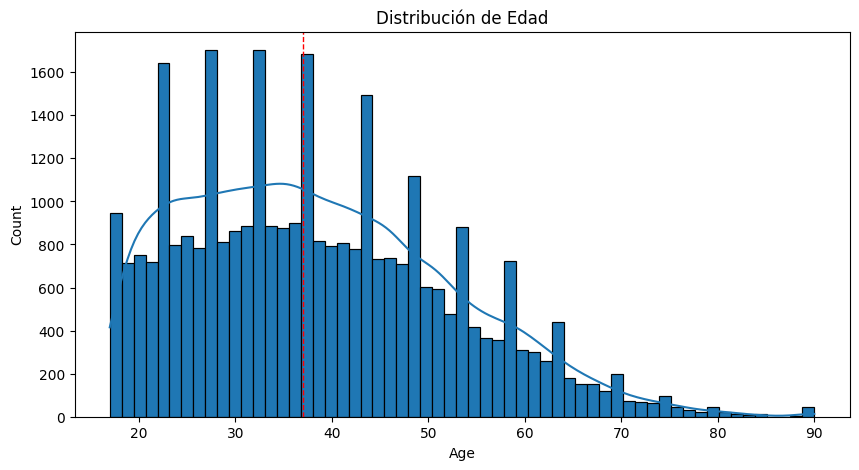

In [6]:
# Gráfico univariado: distribución de la edad y del ingreso
# plt.figure()
# df['age'].hist(bins=30)
median_age = df['age'].median()
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True, edgecolor="black", color="#1f77b4", alpha=1)
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=1, label=f'Mediana: {median_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribución de Edad')
plt.show()

La mayoría de los individuos se concentran entre 20 y 40 años, con una ligera cola a la derecha que sugiere presencia de adultos mayores en la muestra.

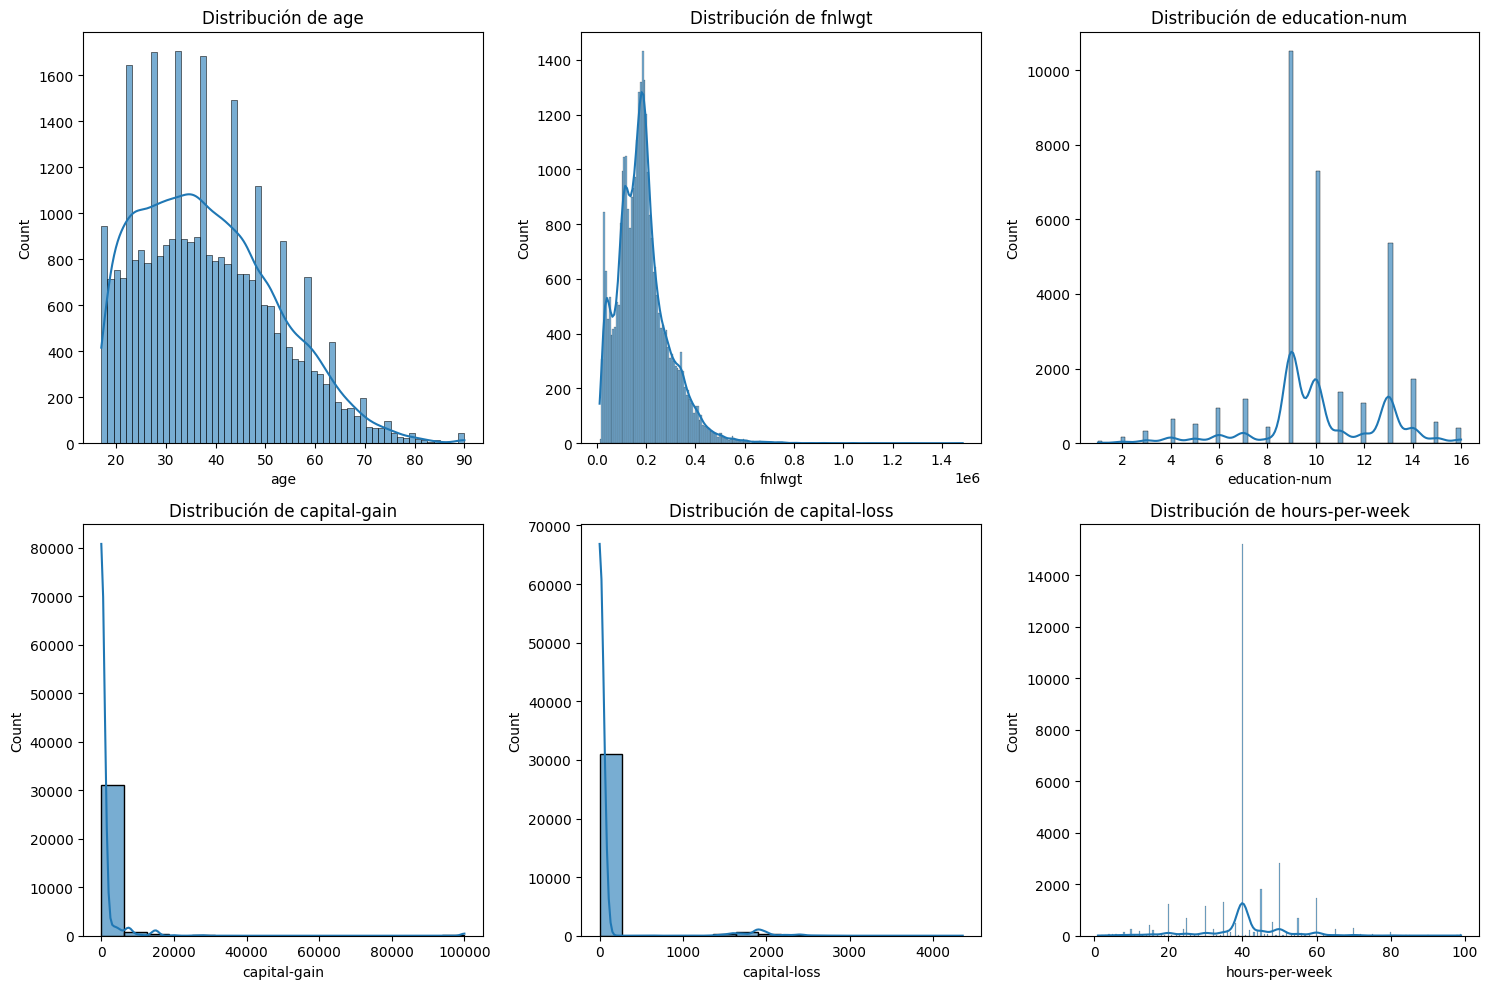

In [7]:
import seaborn as sns

df['target'] = df['income'].map({'<=50K': 0, '>50K': 1})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for ax, var in zip(axes.flatten(), vars):
    sns.histplot(
        data=df,
        x=var,
        kde=True,
        edgecolor='black',
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

En esta figura se agrupan seis histogramas con su curva KDE correspondiente, uno por cada variable cuantitativa seleccionada:

- **age**: muestra la edad de los individuos, concentrada entre 20 y 50 años.  
- **fnlwgt**: peso muestral, con una gran dispersión y presencia de valores extremos.  
- **education-num**: nivel educativo en escala numérica, con picos en los niveles de educación más comunes.  
- **capital-gain** y **capital-loss**: ambas asimétricas a la derecha, reflejando pocos casos con grandes ganancias o pérdidas de capital.  
- **hours-per-week**: horas trabajadas semanalmente, con agrupaciones en jornadas estándar (40 h/semana) y colas hacia mayores cargas horarias.

El uso de KDE permite apreciar mejor la forma de la distribución y detectar posibles outliers en cada variable.


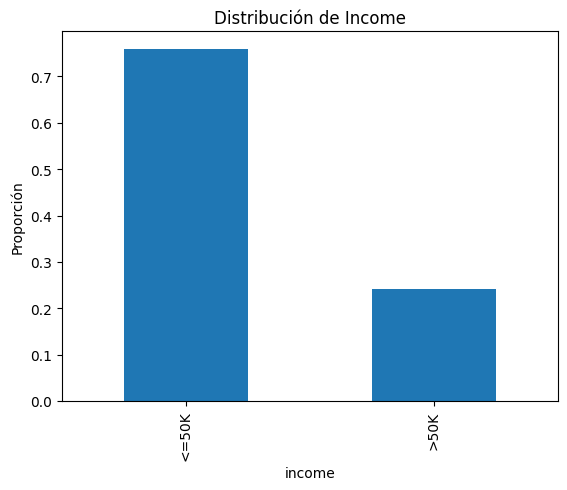

In [8]:
df["income"].value_counts(normalize=True).plot.bar()
plt.title("Distribución de Income")
plt.ylabel("Proporción")
plt.show()

El bar plot muestra que aproximadamente el 75 % de los individuos gana ≤ 50 K y el 25 % gana > 50 K.  
Esto indica que la clase “alta renta” (> 50 K) es minoritaria en el dataset, lo cual habrá que tener en cuenta cuando entrenemos modelos predictivos (desequilibrio de clases).

<Figure size 640x480 with 0 Axes>

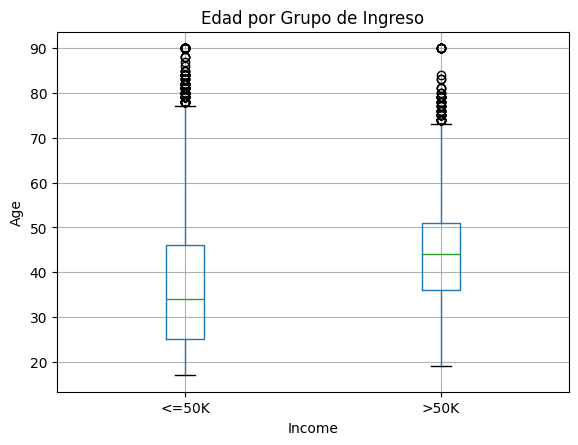

In [9]:
# Gráfico bivariado: edad vs nivel de ingreso
plt.figure()
df.boxplot(column='age', by='income')
plt.suptitle('')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Edad por Grupo de Ingreso')
plt.show()

El grupo de ingresos >50K presenta una mediana de edad ligeramente superior, lo que sugiere que la experiencia (representada por la edad) influye en el nivel de ingreso.

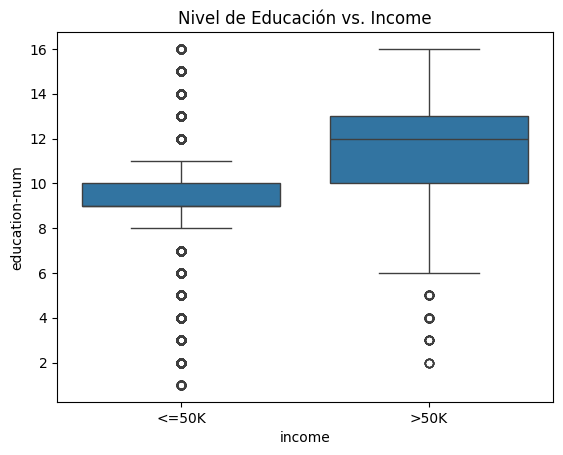

In [10]:
sns.boxplot(x="income", y="education-num", data=df)
plt.title("Nivel de Educación vs. Income")
plt.show()

Se observa que la mediana de `education-num` para el grupo > 50 K es claramente superior a la del grupo ≤ 50 K.  
Esto apoya la **H1**: “A mayor nivel educativo, mayor probabilidad de tener un ingreso > 50 K”.  
Además, la variabilidad de años de educación es mayor en el grupo de menor ingreso, lo que sugiere heterogeneidad en ese segmento.

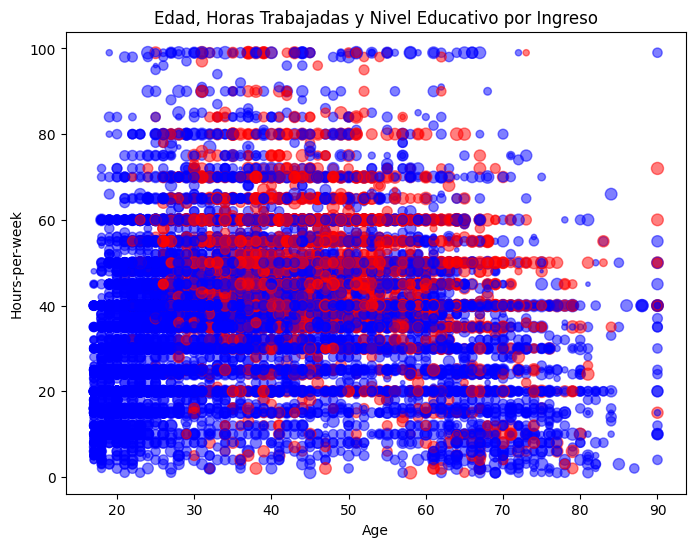

In [11]:
# Gráfico multivariado: age vs hours-per-week, tamaño por education-num, color por income
plt.figure(figsize=(8,6))
colors = {'<=50K':'blue','>50K':'red'}
plt.scatter(
    df['age'], 
    df['hours-per-week'], 
    s=df['education-num']*5, 
    c=df['income'].map(colors), 
    alpha=0.5
)
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Edad, Horas Trabajadas y Nivel Educativo por Ingreso')
plt.show()

Los puntos más grandes (mayor `education-num`) tienden a agruparse en el color rojo, confirmando que niveles educativos más altos se asocian con ingresos >50K y horas de trabajo moderadas.

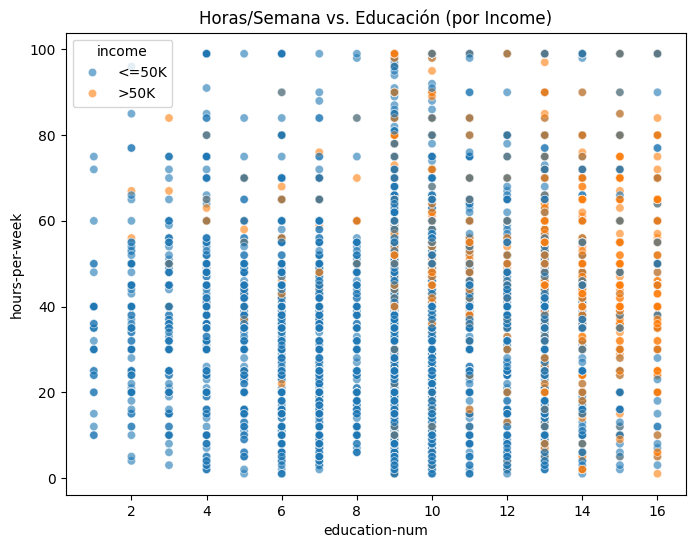

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="education-num", y="hours-per-week",
    hue="income", alpha=0.6, data=df
)
plt.title("Horas/Semana vs. Educación (por Income)")
plt.show()

Se aprecia una tendencia creciente: los puntos correspondientes a > 50 K suelen agruparse en la zona de mayores `education-num` y mayores `hours-per-week`.  
Esto refuerza la **H2**: “Más horas trabajadas y mayor nivel educativo están asociados con ingresos > 50 K”.  
No obstante, hay solapamiento en la región media, por lo que se requerirá un análisis multivariado más profundo.

In [13]:
df["income"] = df["income"].str.strip()

# Elegimos los mismos top 10 países
top_paises = df["native-country"].value_counts().nlargest(10).index
df_top = df[df["native-country"].isin(top_paises)]

# 1. Conteo de registros por país
counts = df_top["native-country"].value_counts()

# 2. Proporción de >50K por país
props = (
    df_top
    .groupby("native-country")["income"]
    .apply(lambda x: (x == ">50K").mean())
)

# 3. Tabla combinada
tabla = pd.DataFrame({
    "count": counts,
    "prop_>50K": props
}).sort_values("prop_>50K", ascending=False)

tabla

,count,prop_>50K
native-country,,
India,100,0.400000
England,90,0.333333
Canada,121,0.322314
Germany,137,0.321168
Philippines,198,0.308081
Cuba,95,0.263158
United-States,29170,0.245835
Puerto-Rico,114,0.105263
El-Salvador,106,0.084906


El gráfico muestra que **India** tiene la proporción más alta de individuos con ingreso >50K (≈40 %), seguida por **Inglaterra** (≈33 %), **Canadá** (≈32 %) y **Alemania** (≈32 %). Le siguen **Filipinas** (≈31 %), **Cuba** (≈26 %) y luego **Estados Unidos** (≈24 %). En el extremo inferior aparecen **Puerto Rico** (~10 %), **El Salvador** (~8 %) y **México** (~5 %).  
Esto confirma la **H3**: la `native-country` influye en la probabilidad de percibir un ingreso elevado, aunque las posiciones relativas no siempre coinciden con el tamaño muestral de cada país.

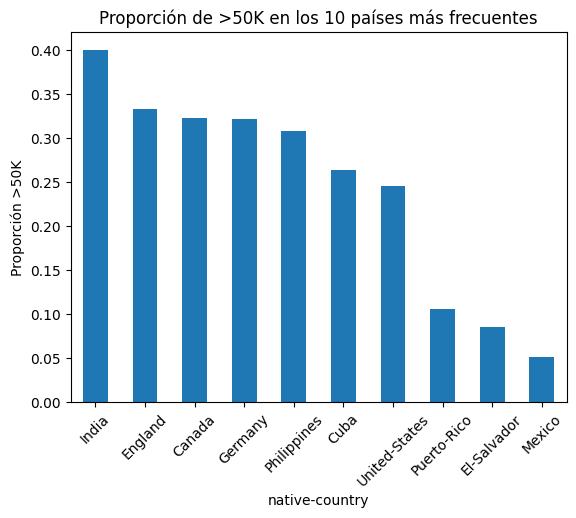

In [14]:
# 6.4.1 – Barplot crudo top 10 países
df["income"] = df["income"].str.strip()
top_paises = df["native-country"].value_counts().nlargest(10).index
df_top = df[df["native-country"].isin(top_paises)]

prop_pais = (
    df_top
    .groupby("native-country")["income"]
    .apply(lambda x: (x == ">50K").mean())
)

prop_pais.sort_values(ascending=False).plot.bar()
plt.title("Proporción de >50K en los 10 países más frecuentes")
plt.ylabel("Proporción >50K")
plt.xticks(rotation=45)
plt.show()

**Interpretación (crudo):**  
El gráfico muestra la proporción de individuos con ingreso >50K en los 10 países más comunes del dataset.  
Por ejemplo, India lidera (~40 %), seguida de Inglaterra (~33 %) y Canadá/Alemania (~32 %).  
**Limitaciones:**  
- Países como Filipinas o Cuba tienen muy pocos registros, por lo que su proporción es inestable.  
- En la siguiente entrega filtraremos por un mínimo de muestras para obtener estimaciones más fiables.

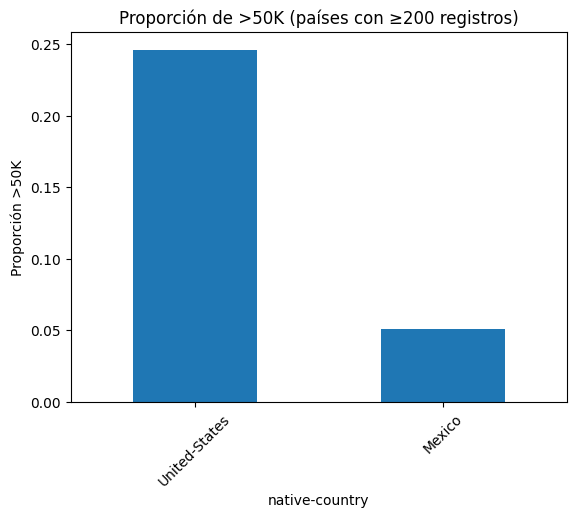

In [15]:
# 6.4.2 – Barplot con umbral mínimo de 200 registros
min_count = 200
counts = df_top["native-country"].value_counts()
props  = prop_pais

# Seleccionamos solo los países con suficientes datos
paises_estables = counts[counts >= min_count].index
tabla_estable   = props.loc[paises_estables]

# Graficamos
tabla_estable.sort_values(ascending=False).plot.bar()
plt.title("Proporción de >50K (países con ≥200 registros)")
plt.ylabel("Proporción >50K")
plt.xticks(rotation=45)
plt.show()


**Interpretación (filtrado ≥200):**  
Al exigir al menos 200 registros solo sobreviven **Estados Unidos** y **México** del top 10.  
- **Estados Unidos** muestra una proporción de individuos con ingreso >50K de aproximadamente 24 %.  
- **México** se sitúa en torno a 5 %.  

Este gráfico, al usar solo países con muestra robusta, ofrece estimaciones más confiables para evaluar la H3.


## 4. Vinculación con las Preguntas de Interés

- **H1**: Confirmada por el boxplot de `education-num` (mediana mayor en >50K).  
- **H2**: El scatterplot sugiere correlación moderada positiva entre `hours-per-week` y >50K.  
- **H3**: pendiente de evaluar con un barplot por país.

## 5. Resultados Esperados y Próximos Pasos

1. Imputar o eliminar nulos en `workclass`, `occupation` y `native-country`.  
2. Crear tablas comparativas de proporción >50K por `native-country`.  
3. Profundizar con análisis multivariado (p. ej., regresión logística) para cuantificar efectos.

In [16]:
# en tu notebook principal, tras cargar df:
df['target'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


target
0    75.919044
1    24.080956
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribución de target'}, xlabel='target'>

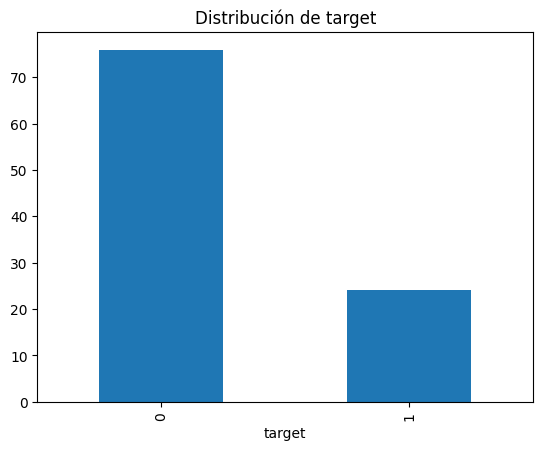

In [17]:
prop = df['target'].value_counts(normalize=True) * 100
print(prop)                        # p. ej. 24% alto ingreso vs 76% bajo ingreso
prop.plot.bar(title='Distribución de target')


In [18]:
num_vars = df.select_dtypes(include=['int64','float64']).drop(columns=['target'])
corr = num_vars.join(df['target']).corr()
print('num_vars', num_vars)
print('corr', corr)

num_vars        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]
corr                      age

,age,education-num,hours-per-week,capital-gain,capital-loss
age,1.000000,0.036527,0.068756,0.077674,0.057775
education-num,0.036527,1.000000,0.148123,0.122630,0.079923
hours-per-week,0.068756,0.148123,1.000000,0.078409,0.054256
capital-gain,0.077674,0.122630,0.078409,1.000000,-0.031615
capital-loss,0.057775,0.079923,0.054256,-0.031615,1.000000


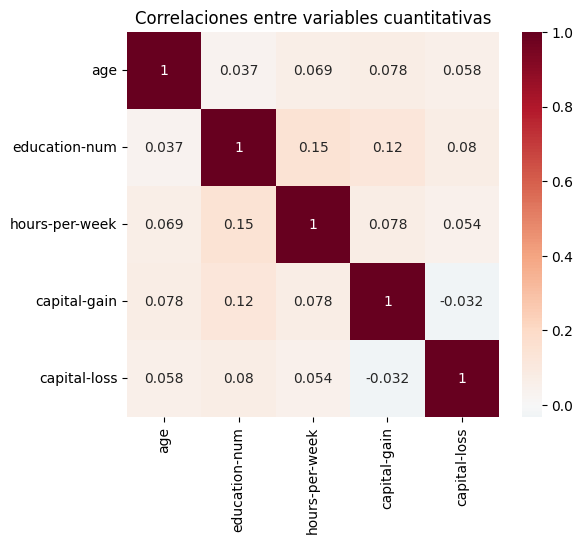

In [19]:
# calcula correlación numérica
corr = df[['age','education-num','hours-per-week','capital-gain','capital-loss']] \
          .corr()
display(corr)
# mapa de calor
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlaciones entre variables cuantitativas')
plt.show()

Text(0.5, 1.0, 'Matriz de correlación')

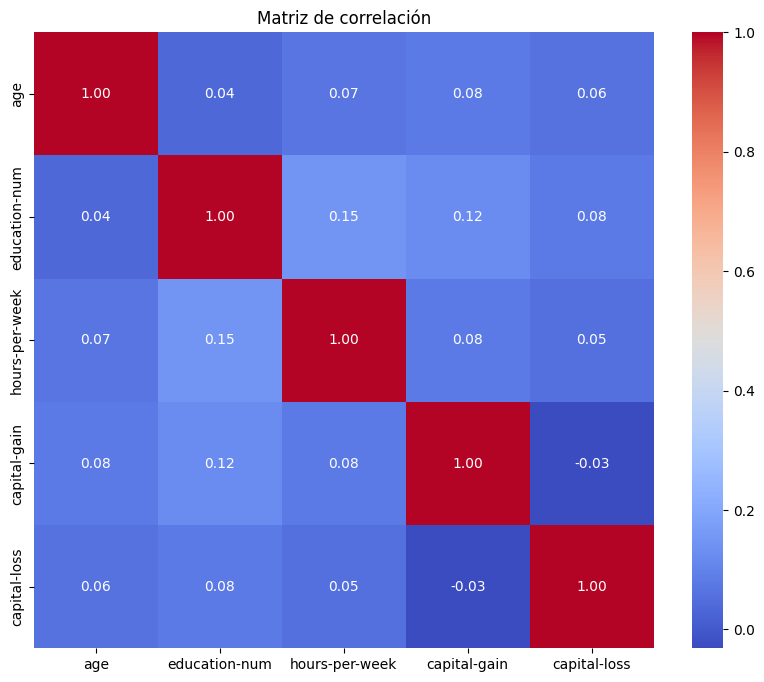

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')


## 4. Ingeniería de atributos y tratamiento de NaN

- Inspeccionar nulos
- Estrategia:
    * Si % muy bajo: borrar filas (df.dropna(subset=[...]))
    * Si % moderado: rellenar con 0 o con la media/mediana
- Codificación de categóricas

In [21]:
df.isnull().mean().sort_values(ascending=False).head(10)


occupation        0.056601
workclass         0.056386
native-country    0.017905
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
age               0.000000
relationship      0.000000
race              0.000000
dtype: float64

In [22]:
# imputar nulos sin chained-assignment
df['workclass']      = df['workclass'].fillna('Unknown')
df['occupation']     = df['occupation'].fillna('Unknown')
df['native-country'] = df['native-country'].fillna('Unknown')

# feature de años de educación agrupados
df['edu_group'] = pd.cut(
    df['education-num'],
    bins=[0, 8, 12, 16, 20],
    labels=['básico', 'medio', 'terciario', 'avanzado']
)
print(df.isnull().mean().sort_values(ascending=False).head(10))


age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
dtype: float64


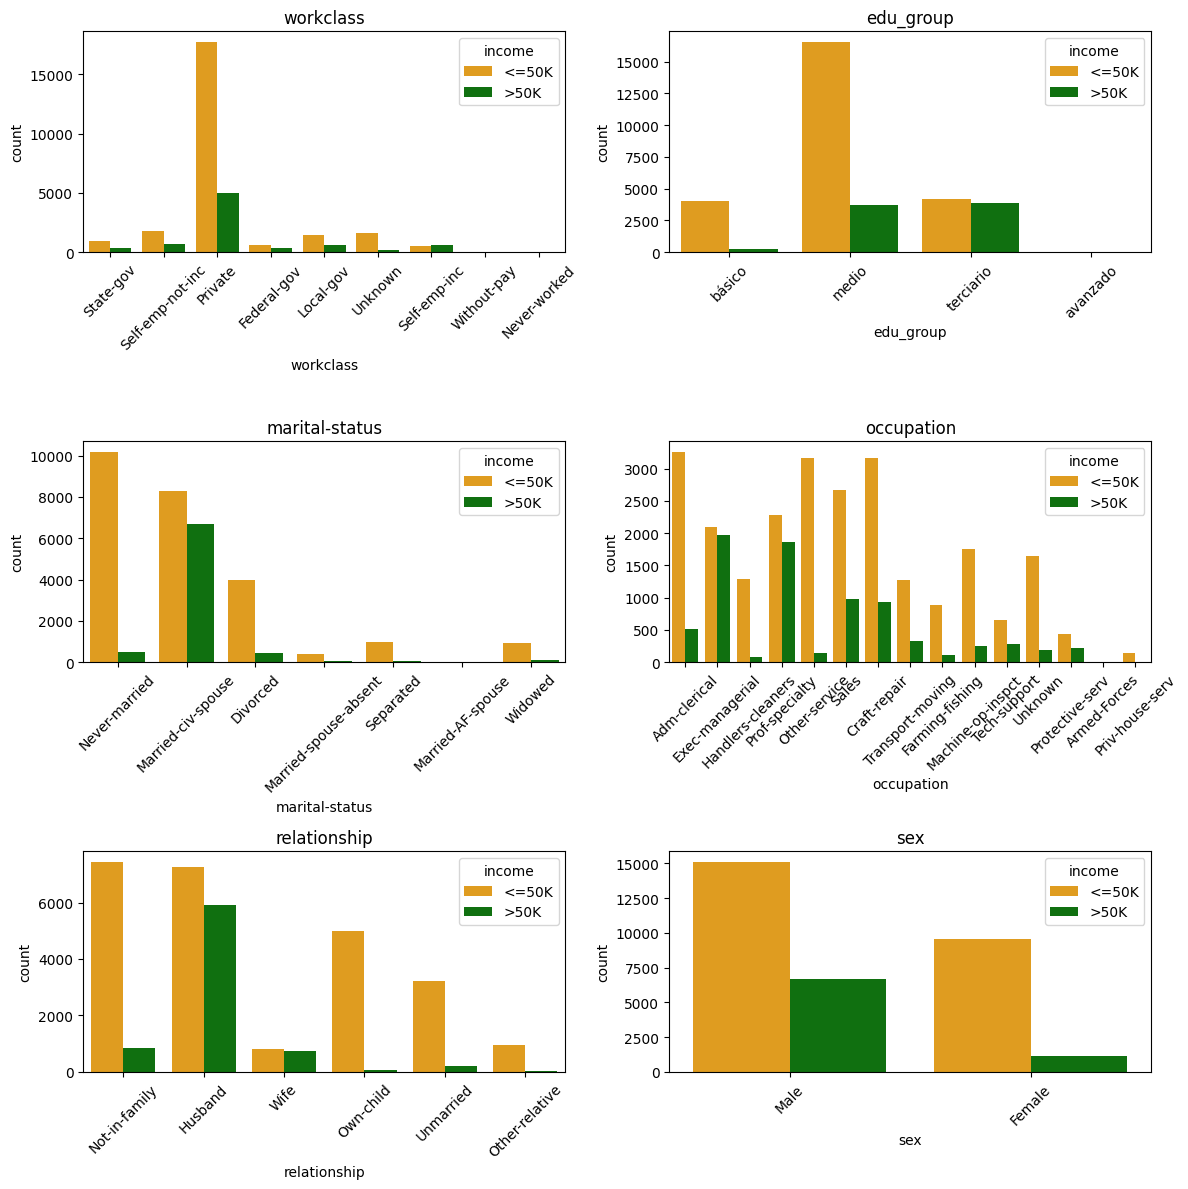

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_vars = ['workclass','edu_group','marital-status','occupation','relationship','sex']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

palette = {'<=50K':'orange', '>50K':'green'}

for ax, var in zip(axes.flatten(), cat_vars):
    sns.countplot(data=df, x=var, hue='income',
                  palette=palette, ax=ax)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split

# X = df.drop(columns=['income','target'])
# y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,
#     stratify=y,
#     random_state=42
# )
# target binaria
df['target'] = df['income'].map({'<=50K':0,'>50K':1})
X = df.drop(columns=['income','target'])
# (codificar categóricas, p.ej. pd.get_dummies...)

X_enc = pd.get_dummies(X, drop_first=True)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


,Accuracy,Recall
RF,0.857209,0.630102
KNN,0.782282,0.334821
XGB,0.874251,0.664541


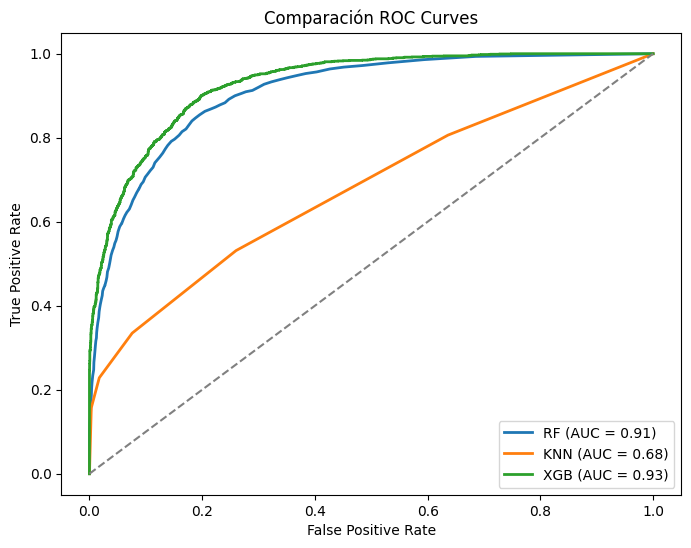

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# 1) Definimos los tres modelos
modelos = {
    'RF':  RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGB': XGBClassifier(eval_metric='logloss', random_state=42, verbosity=0)
}

resultados = {}
probas = {}

# 2) Entrenamos, predecimos y guardamos métricas y probabilidades
for name, mdl in modelos.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    probas[name] = mdl.predict_proba(X_test)[:, 1]

    resultados[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'recall'  : recall_score(y_test, y_pred),
        'conf_mat': confusion_matrix(y_test, y_pred)
    }

# 3) Mostramos tabla de Accuracy y Recall
df_res = pd.DataFrame({
    k: {'Accuracy': v['accuracy'], 'Recall': v['recall']}
    for k, v in resultados.items()
}).T
display(df_res)

# 4) Plot ROC / AUC para los tres
plt.figure(figsize=(8, 6))
for name, y_prob in probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación ROC Curves')
plt.legend(loc='lower right')
plt.show()


In [26]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

# modelos = {
#   'RF': RandomForestClassifier(n_estimators=100, random_state=42),
#   'KNN': KNeighborsClassifier(n_neighbors=5)
# }

# resultados = {}
# for name, mdl in modelos.items():
#     mdl.fit(X_train, y_train)
#     y_pred = mdl.predict(X_test)
#     resultados[name] = {
#       'accuracy': accuracy_score(y_test, y_pred),
#       'recall'  : recall_score(y_test, y_pred),
#       'conf_mat': confusion_matrix(y_test, y_pred)
#     }

# # muestra métricas
# import pandas as pd
# df_res = pd.DataFrame({
#     k: {'Accuracy':v['accuracy'], 'Recall':v['recall']}
#     for k,v in resultados.items()
# }).T
# display(df_res)



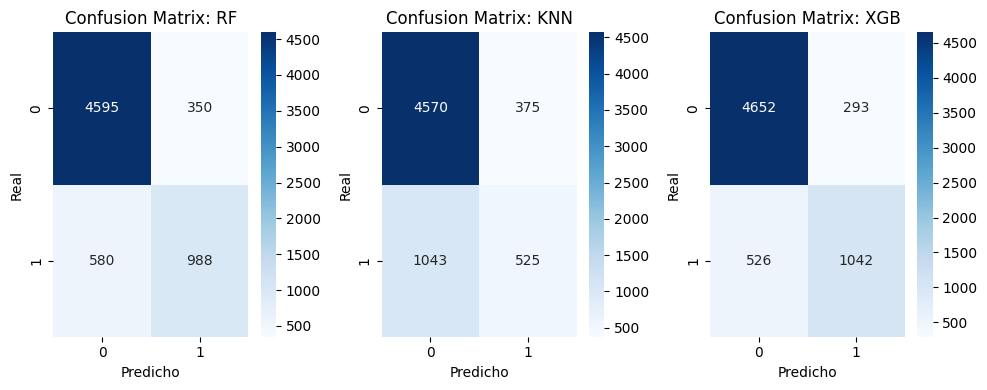

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(10,4))
for ax, (name, res) in zip(axs, resultados.items()):
    sns.heatmap(res['conf_mat'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicho')
    ax.set_ylabel('Real')
plt.tight_layout()
plt.show()

## Análisis con K-Means Clustering

Se aplicó el algoritmo de *K-Means* con 2 clusters para explorar si existen agrupamientos naturales en los datos. Para visualizar estos clusters, se utilizó una reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA), permitiendo representar los datos en dos dimensiones.

El gráfico muestra cómo K-Means divide los datos en dos grupos. Esta segmentación puede ser comparada luego con la variable `income` para analizar si los grupos encontrados reflejan diferencias reales en los ingresos. Además, se agregó la columna `cluster` al dataframe original para realizar futuros análisis en función de estos grupos.

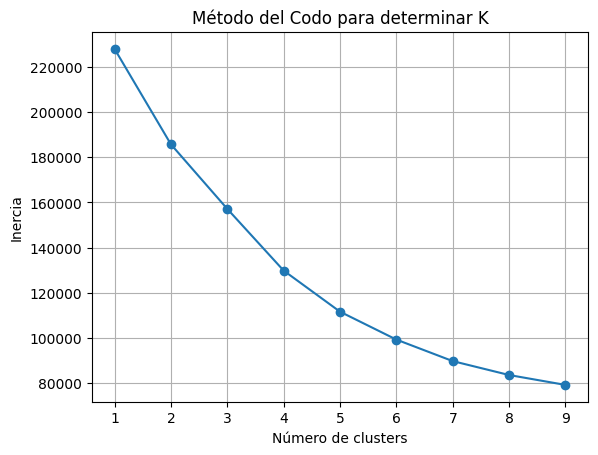

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Escalar variables numéricas
X_kmeans = df.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# Método del codo para determinar K
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para determinar K")
plt.grid(True)
plt.show()


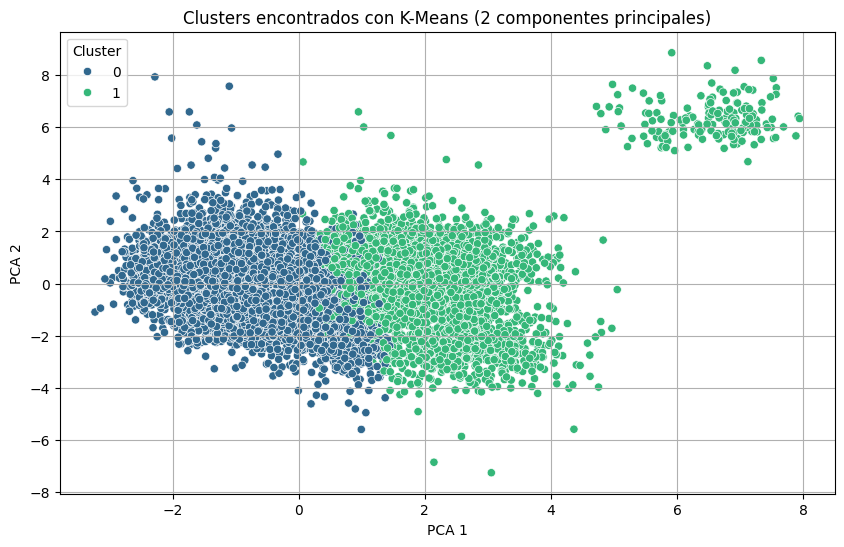

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas ya escaladas si están disponibles o las preparamos
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include='number')  # Selección de features numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Reducción de dimensiones para visualizar (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("Clusters encontrados con K-Means (2 componentes principales)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Agregamos los clusters al dataframe original
df['cluster'] = clusters

### Aplicación de K-Means con 2 clusters

Elegimos 2 clusters como valor inicial para segmentar la población. Luego, agregamos la etiqueta de cluster al dataset.

In [30]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

### Comparación entre los clusters y la variable `income`

In [31]:
# Tabla de contingencia entre clusters e income
pd.crosstab(df['cluster'], df['income'], normalize='index') * 100

income,<=50K,>50K
cluster,,
0,99.971508,0.028492
1,1.989241,98.010759


La tabla muestra el porcentaje de observaciones de cada clase (`<=50K` o `>50K`) dentro de cada cluster encontrado por K-Means.
Esto permite analizar si existe una correlación natural entre los grupos y la variable objetivo.


## Evaluación del Modelo de Clasificación

A continuación se presentan visualizaciones clave para evaluar el desempeño del modelo: matriz de confusión, curva ROC y reporte de clasificación.

In [32]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

## Modelo con Pipeline y Evaluación (Estilo Regresión)

A continuación, implementamos un pipeline que une el preprocesamiento de datos con el modelo, y evaluamos su desempeño utilizando métricas de regresión.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# División de datos
X = df.select_dtypes(include='number').drop(columns='cluster', errors='ignore')
y = df['education-num']  # Elegimos una variable continua como ejemplo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador
numerical_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    # ('regressor', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenamiento
model_pipeline.fit(X_train, y_train)


In [ ]:
# Predicciones
y_pred = model_pipeline.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Métricas del Modelo ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

In [ ]:
# Gráfico de predicciones vs valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()

## Modelo de Clasificación con Pipeline (usando `income` como variable objetivo)

En esta sección se implementa un `Pipeline` que combina el preprocesamiento con un modelo de clasificación (`RandomForestClassifier`). 
La variable objetivo es `income`, transformada a formato binario (`0` para `<=50K`, `1` para `>50K`). 
El objetivo es predecir si una persona tiene un ingreso superior a 50 mil dólares anuales.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Codificar income
df['income_bin'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Definir X e y
X = df.select_dtypes(include='number').drop(columns=['income_bin', 'cluster'], errors='ignore')
y = df['income_bin']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), X.columns)],
    remainder='passthrough'
)

# Pipeline
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar
clf_pipeline.fit(X_train, y_train)

# Predicción
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:, 1]

# Se agrega para visaulizar el grafico del pipeline
clf_pipeline

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()